# **Ex4**

## Names and IDs

 1. 206172686 Sarit Hollander
 2. 313326985 Shahar Shcheranski

## Instructions

In this exercise, you are given (a part of) a data set from a clinical trial. You will need to use 3 types of prediction models and compare between them.
The first model should be a linear classifier.
The second one should be an ensemble model.
The third should be a DL one.

Use the concepts we learn in class: train/validation/test split, grid-search, cross validation etc.
Notice, there is no need to implement the models, you can use scikit ones.

Your submission should be a jupyter notebook that has the next sections:
Loading the data (clean, transform if needed). Then train the three models. Finally, a comparison between the three: quantitative and qualitative (think what is the evaluation method you use).

Answer the next questions:
1. For each model, does the model overfit?
2. In the DL model, what's the effect of batch size? In general, and do you see this effect in the current task?

The data has 30 features:
* INTENSIVE - The clinical arm that was used (intensive or regular)
* NEWSITEID - Site ID in which the participant was treated
* RISK10YRS - Predicted risk for cardiovascular diseases
* INCLUSIONFRS - Binary risk group
* SBP - Systolic blood pressure
* DBP - Diastolic blood pressure
* N_AGENTS - Number of medications prescribed
* NOAGENTS - Participants on no anti-hypertensive agents
* smoke_3cat - Derived: Baseline smoking status
* aspirin - BSL Hist: Daily Aspirin Use
* egfr - Lab: eGFR MDRD (mL/min/1.73m^2)
* screat - Lab: serum creatinine, mg/dL
* sub_ckd - Derived: Subgroup with CKD (eGFR<60)
* race_black - Incl/Excl: Black, African-American
* age - Derived: Age at randomization top-coded at 90 years
* female - Derived: Female gender
* sub_cvd - Derived: subgroup with history of clinical/subclinical CVD
* sub_clinicalcvd - Derived: subgroup with history of clinical CVD
* sub_subclinicalcvd - Derived: subgroup with history of subclinical CVD
* sub_senior - Derived: subgroup ≥75 years old at randomization
* race4 - Derived: Four-level race variable (character)
* CHR - Lab: Cholesterol, mg/dL
* GLUR - Lab: Glucose, mg/dL
* HDL - Lab: HDL-cholesterol direct, mg/dL
* TRR - Lab: Triglycerides, mg/dL
* UMALCR - Lab: mg Urine Alb / (g Creat * 0.01), mg/g Cr
* BMI - Derived: body mass index (kg/m^2)
* statin - Derived: on any statin
* SBPTertile - Derived: Systolic BP tertile
* EVENT_PRIMARY - Outcome (patient died or had a cardiovascular event)

Notice: You need to well explain why you choose the specific algorithms, configurations, or other decisions you made.
In the end, briefly summarize the method and details.

## Import All Packages
Add all imports needed for this notebook to run

In [ ]:
import requests
from io import StringIO
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import mean, std
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTENC
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.metrics import classification_report, balanced_accuracy_score, roc_curve, roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn import datasets, metrics, model_selection

## Loading the data

In [ ]:
# Download the data from url

url='https://drive.google.com/file/d/1ZgAuQD5J5i9oleWj5pSRYRRkFx-PBgqL/view?usp=sharing'

file_id = url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url2 = requests.get(dwn_url).text
csv_raw = StringIO(url2)
data = pd.read_csv(csv_raw)
data

,INTENSIVE,NEWSITEID,RISK10YRS,INCLUSIONFRS,SBP,DBP,N_AGENTS,NOAGENTS,SMOKE_3CAT,ASPIRIN,EGFR,SCREAT,SUB_CKD,RACE_BLACK,AGE,FEMALE,SUB_CVD,SUB_CLINICALCVD,SUB_SUBCLINICALCVD,SUB_SENIOR,RACE4,CHR,GLUR,HDL,TRR,UMALCR,BMI,STATIN,SBPTERTILE,EVENT_PRIMARY
0,Regular,74.0,29.732061,True,145,80,2,False,3,True,67.69,1.11,False,False,60,False,True,True,False,False,WHITE,155,81,36,92,5.80,33.115201,True,3,False
1,Regular,8.0,29.677619,True,138,71,1,False,2,True,60.64,1.17,False,False,75,False,False,False,False,True,WHITE,243,107,61,188,5.45,28.842380,True,2,False
2,Intensive,25.0,17.443819,True,143,92,2,False,2,False,68.44,1.09,False,False,62,False,False,False,False,False,WHITE,180,116,47,125,13.33,33.643060,False,2,False
3,Regular,96.0,8.627849,False,123,68,2,False,1,False,71.94,0.78,False,False,75,True,False,False,False,True,WHITE,234,93,89,109,6.12,29.337871,False,1,False
4,Intensive,42.0,23.751437,True,126,51,2,False,2,False,50.19,1.36,True,False,81,False,False,False,False,True,WHITE,126,108,39,84,28.78,36.660286,False,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8741,Regular,102.0,10.896486,False,138,59,2,False,2,True,79.57,0.71,False,False,78,True,False,False,False,True,WHITE,199,90,85,74,12.73,27.186534,True,2,False
8742,Regular,98.0,8.646088,False,119,73,3,False,2,False,22.60,2.08,True,False,85,True,False,False,False,True,WHITE,145,83,52,95,440.38,42.191997,True,1,False
8743,Regular,99.0,24.191491,True,137,75,0,True,2,False,74.74,1.00,False,False,66,False,True,True,False,False,WHITE,167,80,46,75,26.92,19.462021,True,2,False
8744,Intensive,15.0,20.354619,True,154,93,0,True,2,True,32.32,1.64,True,False,56,True,False,False,False,False,WHITE,245,103,37,369,3.20,35.579436,False,3,False


### Clean and Transform

In [ ]:
# Check for null values
count_nan_in_data = data.isnull().sum()
count_nan_in_data

INTENSIVE               0
NEWSITEID             465
RISK10YRS               0
INCLUSIONFRS            0
SBP                     0
DBP                     0
N_AGENTS                0
NOAGENTS                0
SMOKE_3CAT              0
ASPIRIN                 0
EGFR                    0
SCREAT                  0
SUB_CKD                 0
RACE_BLACK              0
AGE                     0
FEMALE                  0
SUB_CVD                 0
SUB_CLINICALCVD         0
SUB_SUBCLINICALCVD      0
SUB_SENIOR              0
RACE4                   0
CHR                     0
GLUR                    0
HDL                     0
TRR                     0
UMALCR                  0
BMI                     0
STATIN                  0
SBPTERTILE              0
EVENT_PRIMARY           0
dtype: int64

In [ ]:
# Drop the NEWSITEID column
data = data.drop(['NEWSITEID'], axis=1)
data

,INTENSIVE,RISK10YRS,INCLUSIONFRS,SBP,DBP,N_AGENTS,NOAGENTS,SMOKE_3CAT,ASPIRIN,EGFR,SCREAT,SUB_CKD,RACE_BLACK,AGE,FEMALE,SUB_CVD,SUB_CLINICALCVD,SUB_SUBCLINICALCVD,SUB_SENIOR,RACE4,CHR,GLUR,HDL,TRR,UMALCR,BMI,STATIN,SBPTERTILE,EVENT_PRIMARY
0,Regular,29.732061,True,145,80,2,False,3,True,67.69,1.11,False,False,60,False,True,True,False,False,WHITE,155,81,36,92,5.80,33.115201,True,3,False
1,Regular,29.677619,True,138,71,1,False,2,True,60.64,1.17,False,False,75,False,False,False,False,True,WHITE,243,107,61,188,5.45,28.842380,True,2,False
2,Intensive,17.443819,True,143,92,2,False,2,False,68.44,1.09,False,False,62,False,False,False,False,False,WHITE,180,116,47,125,13.33,33.643060,False,2,False
3,Regular,8.627849,False,123,68,2,False,1,False,71.94,0.78,False,False,75,True,False,False,False,True,WHITE,234,93,89,109,6.12,29.337871,False,1,False
4,Intensive,23.751437,True,126,51,2,False,2,False,50.19,1.36,True,False,81,False,False,False,False,True,WHITE,126,108,39,84,28.78,36.660286,False,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8741,Regular,10.896486,False,138,59,2,False,2,True,79.57,0.71,False,False,78,True,False,False,False,True,WHITE,199,90,85,74,12.73,27.186534,True,2,False
8742,Regular,8.646088,False,119,73,3,False,2,False,22.60,2.08,True,False,85,True,False,False,False,True,WHITE,145,83,52,95,440.38,42.191997,True,1,False
8743,Regular,24.191491,True,137,75,0,True,2,False,74.74,1.00,False,False,66,False,True,True,False,False,WHITE,167,80,46,75,26.92,19.462021,True,2,False
8744,Intensive,20.354619,True,154,93,0,True,2,True,32.32,1.64,True,False,56,True,False,False,False,False,WHITE,245,103,37,369,3.20,35.579436,False,3,False


In [ ]:
# Replace categoty features to dummies
data = pd.get_dummies(data, columns = ['RACE4','SMOKE_3CAT','SBPTERTILE','INTENSIVE'])
data

,RISK10YRS,INCLUSIONFRS,SBP,DBP,N_AGENTS,NOAGENTS,ASPIRIN,EGFR,SCREAT,SUB_CKD,RACE_BLACK,AGE,FEMALE,SUB_CVD,SUB_CLINICALCVD,SUB_SUBCLINICALCVD,SUB_SENIOR,CHR,GLUR,HDL,TRR,UMALCR,BMI,STATIN,EVENT_PRIMARY,RACE4_BLACK,RACE4_HISPANIC,RACE4_OTHER,RACE4_WHITE,SMOKE_3CAT_1,SMOKE_3CAT_2,SMOKE_3CAT_3,SBPTERTILE_1,SBPTERTILE_2,SBPTERTILE_3,INTENSIVE_Intensive,INTENSIVE_Regular
0,29.732061,True,145,80,2,False,True,67.69,1.11,False,False,60,False,True,True,False,False,155,81,36,92,5.80,33.115201,True,False,0,0,0,1,0,0,1,0,0,1,0,1
1,29.677619,True,138,71,1,False,True,60.64,1.17,False,False,75,False,False,False,False,True,243,107,61,188,5.45,28.842380,True,False,0,0,0,1,0,1,0,0,1,0,0,1
2,17.443819,True,143,92,2,False,False,68.44,1.09,False,False,62,False,False,False,False,False,180,116,47,125,13.33,33.643060,False,False,0,0,0,1,0,1,0,0,1,0,1,0
3,8.627849,False,123,68,2,False,False,71.94,0.78,False,False,75,True,False,False,False,True,234,93,89,109,6.12,29.337871,False,False,0,0,0,1,1,0,0,1,0,0,0,1
4,23.751437,True,126,51,2,False,False,50.19,1.36,True,False,81,False,False,False,False,True,126,108,39,84,28.78,36.660286,False,False,0,0,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8741,10.896486,False,138,59,2,False,True,79.57,0.71,False,False,78,True,False,False,False,True,199,90,85,74,12.73,27.186534,True,False,0,0,0,1,0,1,0,0,1,0,0,1
8742,8.646088,False,119,73,3,False,False,22.60,2.08,True,False,85,True,False,False,False,True,145,83,52,95,440.38,42.191997,True,False,0,0,0,1,0,1,0,1,0,0,0,1
8743,24.191491,True,137,75,0,True,False,74.74,1.00,False,False,66,False,True,True,False,False,167,80,46,75,26.92,19.462021,True,False,0,0,0,1,0,1,0,0,1,0,0,1
8744,20.354619,True,154,93,0,True,True,32.32,1.64,True,False,56,True,False,False,False,False,245,103,37,369,3.20,35.579436,False,False,0,0,0,1,0,1,0,0,0,1,1,0


In [ ]:
# Replace booleans with numbers (False - 0 & True - 1)
labelencoder = LabelEncoder()
colnames_not_numerics_only = data.select_dtypes(include=['bool']).columns.tolist()
for col in colnames_not_numerics_only:
    data[col] = labelencoder.fit_transform(data[col])
data

,RISK10YRS,INCLUSIONFRS,SBP,DBP,N_AGENTS,NOAGENTS,ASPIRIN,EGFR,SCREAT,SUB_CKD,RACE_BLACK,AGE,FEMALE,SUB_CVD,SUB_CLINICALCVD,SUB_SUBCLINICALCVD,SUB_SENIOR,CHR,GLUR,HDL,TRR,UMALCR,BMI,STATIN,EVENT_PRIMARY,RACE4_BLACK,RACE4_HISPANIC,RACE4_OTHER,RACE4_WHITE,SMOKE_3CAT_1,SMOKE_3CAT_2,SMOKE_3CAT_3,SBPTERTILE_1,SBPTERTILE_2,SBPTERTILE_3,INTENSIVE_Intensive,INTENSIVE_Regular
0,29.732061,1,145,80,2,0,1,67.69,1.11,0,0,60,0,1,1,0,0,155,81,36,92,5.80,33.115201,1,0,0,0,0,1,0,0,1,0,0,1,0,1
1,29.677619,1,138,71,1,0,1,60.64,1.17,0,0,75,0,0,0,0,1,243,107,61,188,5.45,28.842380,1,0,0,0,0,1,0,1,0,0,1,0,0,1
2,17.443819,1,143,92,2,0,0,68.44,1.09,0,0,62,0,0,0,0,0,180,116,47,125,13.33,33.643060,0,0,0,0,0,1,0,1,0,0,1,0,1,0
3,8.627849,0,123,68,2,0,0,71.94,0.78,0,0,75,1,0,0,0,1,234,93,89,109,6.12,29.337871,0,0,0,0,0,1,1,0,0,1,0,0,0,1
4,23.751437,1,126,51,2,0,0,50.19,1.36,1,0,81,0,0,0,0,1,126,108,39,84,28.78,36.660286,0,0,0,0,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8741,10.896486,0,138,59,2,0,1,79.57,0.71,0,0,78,1,0,0,0,1,199,90,85,74,12.73,27.186534,1,0,0,0,0,1,0,1,0,0,1,0,0,1
8742,8.646088,0,119,73,3,0,0,22.60,2.08,1,0,85,1,0,0,0,1,145,83,52,95,440.38,42.191997,1,0,0,0,0,1,0,1,0,1,0,0,0,1
8743,24.191491,1,137,75,0,1,0,74.74,1.00,0,0,66,0,1,1,0,0,167,80,46,75,26.92,19.462021,1,0,0,0,0,1,0,1,0,0,1,0,0,1
8744,20.354619,1,154,93,0,1,1,32.32,1.64,1,0,56,1,0,0,0,0,245,103,37,369,3.20,35.579436,0,0,0,0,0,1,0,1,0,0,0,1,1,0


In [ ]:
# Split the data to x and y
X = data.loc[:, data.columns!='EVENT_PRIMARY']
y = data.loc[:, 'EVENT_PRIMARY']

# Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Normalize the data
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)


In [ ]:
# Count the labels to check if imbalanced
y_train.value_counts()

0    6170
1     389
Name: EVENT_PRIMARY, dtype: int64

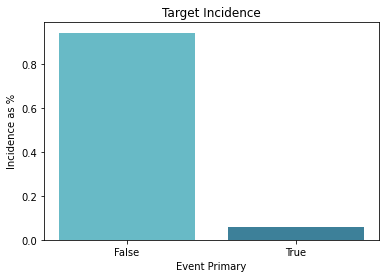

In [ ]:
plt.bar(['False', 'True'], y_train.value_counts(normalize=True), color=sns.color_palette("GnBu_d", n_colors=2))
plt.title('Target Incidence')
plt.ylabel('Incidence as %')
plt.xlabel('Event Primary')
plt.show()

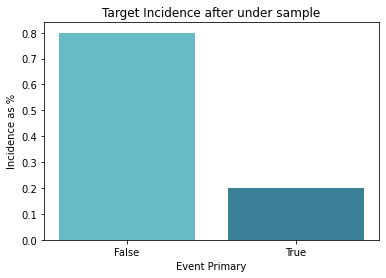

In [ ]:
# Under sample False target
rus = RandomUnderSampler(random_state=0,sampling_strategy=0.25)
X_train, y_train = rus.fit_resample(X_train, y_train)

plt.bar(['False', 'True'], y_train.value_counts(normalize=True), color=sns.color_palette("GnBu_d", n_colors=2))
plt.title('Target Incidence after under sample')
plt.ylabel('Incidence as %')
plt.xlabel('Event Primary')
plt.show()

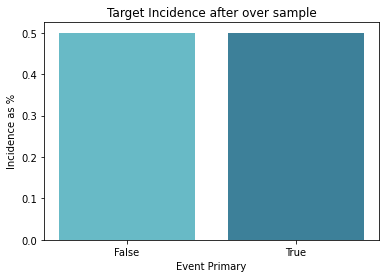

In [ ]:
# Over sample True target
cat_columns_ser=[
       'FEMALE', 'SUB_SENIOR',"ASPIRIN",'STATIN','INCLUSIONFRS','SMOKE_3CAT_1',
       'SMOKE_3CAT_2', 'SMOKE_3CAT_3','SBPTERTILE_1','SBPTERTILE_2',
       'SBPTERTILE_3','RACE4_BLACK', 'RACE4_HISPANIC', 'RACE4_OTHER',
       'RACE4_WHITE', 'INTENSIVE_Intensive', 'INTENSIVE_Regular','SUB_CKD',
       'SUB_CVD','SUB_CLINICALCVD','SUB_SUBCLINICALCVD'
       ]

cat_columns = X.columns.get_indexer(cat_columns_ser)

sm = SMOTENC(categorical_features=cat_columns, k_neighbors=2)
X_train, y_train = sm.fit_resample(X_train, y_train)

plt.bar(['False', 'True'], y_train.value_counts(normalize=True), color=sns.color_palette("GnBu_d", n_colors=2))
plt.title('Target Incidence after over sample')
plt.ylabel('Incidence as %')
plt.xlabel('Event Primary')
plt.show()

In [ ]:
# Count the labels after under sample
y_train.value_counts()

1    1556
0    1556
Name: EVENT_PRIMARY, dtype: int64

In [ ]:
X_train.shape

(3112, 36)

In [ ]:
X_test.shape

(2187, 36)

## Train the three models

### First model - linear classifier





Logistic Regression
              precision    recall  f1-score   support

       False       0.96      0.68      0.80      2037
        True       0.12      0.57      0.20       150

    accuracy                           0.68      2187
   macro avg       0.54      0.63      0.50      2187
weighted avg       0.90      0.68      0.76      2187

AUC: 0.685
Balanced Accuracy: 0.629
Cross Validation mean: 0.662
---------------------------------------------------------
Support Vector Machine
              precision    recall  f1-score   support

       False       0.96      0.68      0.80      2037
        True       0.12      0.58      0.20       150

    accuracy                           0.68      2187
   macro avg       0.54      0.63      0.50      2187
weighted avg       0.90      0.68      0.76      2187

AUC: 0.686
Balanced Accuracy: 0.632
Cross Validation mean: 0.668
---------------------------------------------------------
Naive Base
              precision    recall  f1-score   

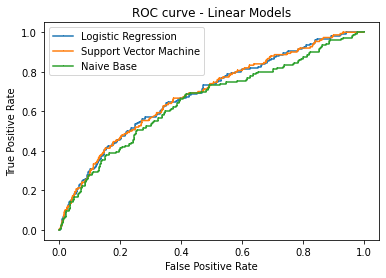

In [ ]:
pipeline_lr = make_pipeline(LogisticRegression(random_state=42))
param_grid_lr = [{'logisticregression__C': [1, 10, 100, 1000]}]

pipeline_svm = make_pipeline(SVC(kernel='linear',random_state=42, probability=True))
param_grid_svm = [{'svc__C': [1, 10, 100]}]

pipeline_nb = make_pipeline(GaussianNB())
param_grid_nb = {'gaussiannb__var_smoothing': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}

pipelines = [pipeline_lr, pipeline_svm, pipeline_nb]
param_grids = [param_grid_lr, param_grid_svm, param_grid_nb]
pipe_dict = {0: 'Logistic Regression', 1: 'Support Vector Machine', 2: 'Naive Base'}

model_to_fpr_tpr = {}

best_linear_models = []
for index in range(3):
  gs = GridSearchCV(pipelines[index], param_grids[index], verbose=0,n_jobs=4)
  best_model = gs.fit(X_train, y_train)
  best_linear_models.append(best_model)
for i,model in enumerate(best_linear_models):
    # print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(X_test,y_test)))
    print(pipe_dict[i])
    y_pred = model.predict(X_test)
    target_names = ['False', 'True']
    print(classification_report(y_test, y_pred, target_names=target_names))
    probs = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, probs)
    fpr, tpr, _ = roc_curve(y_test, probs)
    model_to_fpr_tpr[pipe_dict[i]] = (fpr, tpr)
    plt.plot(fpr, tpr, marker=',', label=pipe_dict[i])
    print('AUC: %.3f' % auc)
    print('Balanced Accuracy: %.3f' % balanced_accuracy_score(y_test,y_pred))
    print('Cross Validation mean: %.3f' % mean(cross_val_score(model,X_train,y_train,cv=5)))
    print('---------------------------------------------------------')


# Plot the roc curve for the linear models
plt.title('ROC curve - Linear Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Second model - ensemble model

Random Forest
              precision    recall  f1-score   support

       False       0.95      0.74      0.83      2037
        True       0.13      0.52      0.20       150

    accuracy                           0.72      2187
   macro avg       0.54      0.63      0.52      2187
weighted avg       0.90      0.72      0.79      2187

AUC: 0.682
Balanced Accuracy: 0.629
Cross Validation mean: 0.721
---------------------------------------------------------
Adaboost
              precision    recall  f1-score   support

       False       0.96      0.66      0.78      2037
        True       0.12      0.63      0.20       150

    accuracy                           0.66      2187
   macro avg       0.54      0.65      0.49      2187
weighted avg       0.90      0.66      0.74      2187

AUC: 0.658
Balanced Accuracy: 0.645
Cross Validation mean: 0.666
---------------------------------------------------------


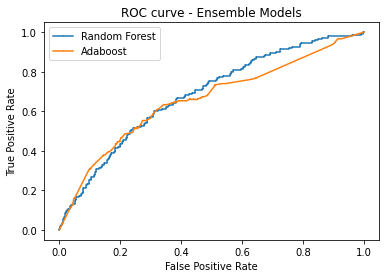

In [ ]:
pipe_rf = make_pipeline(RandomForestClassifier(random_state=42))
grid_param_rf = {
    "randomforestclassifier__n_estimators":[10,100,1000],
    "randomforestclassifier__max_depth":[5,15,25,30],
    "randomforestclassifier__min_samples_leaf":[1,10,50,100],
    "randomforestclassifier__max_leaf_nodes": [2, 5,10]
    }

pipe_adab = make_pipeline(AdaBoostClassifier(algorithm='SAMME', random_state=42))
grid_param_adab = {
    "adaboostclassifier__n_estimators":[1, 10, 50, 100, 1000],
    "adaboostclassifier__base_estimator":[LinearSVC()]
    }

pipelines = [pipe_rf, pipe_adab]
param_grids = [grid_param_rf, grid_param_adab]
pipe_dict = {0: 'Random Forest', 1: 'Adaboost'}

best_ensemble_models = []
for index in range(2):
  gs = GridSearchCV(pipelines[index], param_grids[index], verbose=0,n_jobs=4)
  best_model = gs.fit(X_train, y_train)
  best_ensemble_models.append(best_model)
for i,model in enumerate(best_ensemble_models):
    # print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(X_test,y_test)))
    print(pipe_dict[i])
    y_pred = model.predict(X_test)
    target_names = ['False', 'True']
    print(classification_report(y_test, y_pred, target_names=target_names))
    probs = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, probs)
    fpr, tpr, _ = roc_curve(y_test, probs)
    model_to_fpr_tpr[pipe_dict[i]] = (fpr, tpr)
    plt.plot(fpr, tpr, marker=',', label=pipe_dict[i])
    print('AUC: %.3f' % auc)
    print('Balanced Accuracy: %.3f' % balanced_accuracy_score(y_test,y_pred))
    print('Cross Validation mean: %.3f' % mean(cross_val_score(model,X_train,y_train,cv=5)))
    print('---------------------------------------------------------')


# Plot the roc curve for the linear models
plt.title('ROC curve - Ensemble Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

###  Third model - DL

In [ ]:
# Dense - Fully connected layers
dl = Sequential()
# First layer with 36 inputs and 14 nodes in first hidden layer
dl.add(Dense(14, input_dim=36, activation='relu'))
# Second hidden layer with 6 nodes
dl.add(Dense(6, activation='relu'))
# Output a binary classifiers
dl.add(Dense(1, activation='relu'))
print(dl.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                518       
                                                                 
 dense_1 (Dense)             (None, 6)                 90        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 615
Trainable params: 615
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Compile model
dl.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the model
dl_hist = dl.fit(X_train, y_train, epochs=150,validation_split = 0.1 ,batch_size=250,verbose=0)

In [ ]:
# evalute the model
loss, accuracy = dl.evaluate(X_test,y_test, verbose=0)
print(f'Loss:  %.2f, Accuracy: %.2f' % (loss, accuracy*100))

Loss:  0.87, Accuracy: 65.16


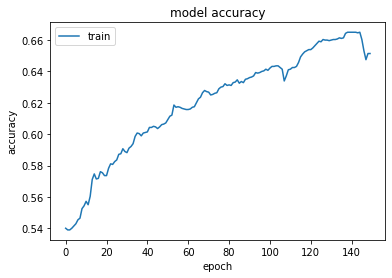

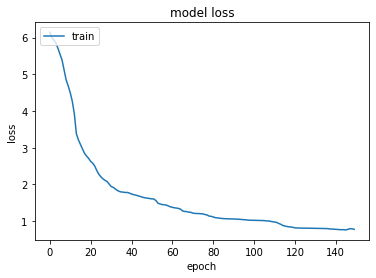

In [ ]:
def plot_model_history(history):
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()

plot_model_history(dl_hist)

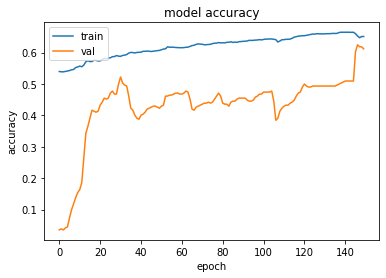

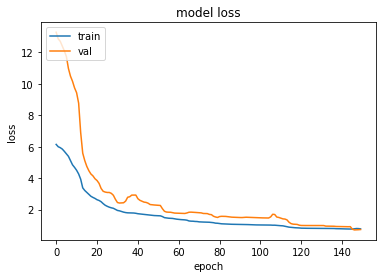

In [ ]:
# Plot validation accuracy and loss
plt.plot(dl_hist.history['accuracy'])
plt.plot(dl_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(dl_hist.history['loss'])
plt.plot(dl_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**In the DL model, what's the effect of batch size? In general, and do you see this effect in the current task?**

Answer: Batch size controls the accuracy of the estimate of the error gradient when training neural networks. A batch size of 250 means that 250 samples from the training dataset will be used to estimate the error gradient before the model weights are updated. We see this effect when decrease/increase the batch size the loss function change accordingly.

In [ ]:
# check overfitting

def print_model_accuracy(model,X,y):
    loss, accuracy = model.evaluate(X, y, verbose=0)
    print(f'Loss:  %.2f, Accuracy: %.2f' % (loss, accuracy*100))

print_model_accuracy(dl, X_train, y_train)
print_model_accuracy(dl, X_test, y_test)

Loss:  0.77, Accuracy: 64.72
Loss:  0.87, Accuracy: 65.16


We can see the test results are better than the train results, hence we can say the model is not overfit.

In [ ]:
probs = dl.predict(X_test)[:, 0]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

predict_x = dl.predict(X_test)
y_pred = (predict_x > 0.5).astype("int32")
target_names = ['False', 'True']
print(classification_report(y_test, y_pred, target_names=target_names))
print("balanced accuracy: "+str(balanced_accuracy_score(y_test,y_pred)))


AUC: 0.581
              precision    recall  f1-score   support

       False       0.94      0.67      0.78      2037
        True       0.09      0.44      0.15       150

    accuracy                           0.65      2187
   macro avg       0.52      0.55      0.46      2187
weighted avg       0.88      0.65      0.74      2187

balanced accuracy: 0.553578792341679


## Comparison between the three models
Quantitative and qualitative (think what is the evaluation method you use).

As we noticed the most important metric is the combination of the recall of class 1 with the precision of class 1 (true), because miss classifying class 1 as class 0 is very severe (metter of lives), so we tried to maximize the recall and precision of class 1, with minimum interruption with those of class 0 this is represented in the balanced accuracy.
In previues results, the linear model with best balanced accuracy is SVM, the ensemble model is Adaboost

In [ ]:
# Probabilities of SVM Classifier
svm = best_linear_models[1]
svm_probas = svm.predict_proba(X_test)[:, 1]
svm_auc = roc_auc_score(y_test, svm_probas)
print('SVM AUC: %.3f' % svm_auc)

# Probabilities of Adaboost Classifier
adaboost = best_ensemble_models[1]
adaboost_probas = adaboost.predict_proba(X_test)[:, 1]
adaboost_auc = roc_auc_score(y_test, adaboost_probas)
print('Adaboost AUC: %.3f' % adaboost_auc)

# Probabilities of DL
probs = dl.predict(X_test)[:, 0]
auc = roc_auc_score(y_test, probs)
print('DL AUC: %.3f' % auc)

# generate a no skill prediction (majority class)
common_label = int(round(sum(y_train)/len(y_train)))
base_probs = [common_label for _ in range(len(y_test))]
base_auc = roc_auc_score(y_test, base_probs)
print('BASE AUC: %.3f' % base_auc)

SVM AUC: 0.686
Adaboost AUC: 0.658
DL AUC: 0.581
BASE AUC: 0.500


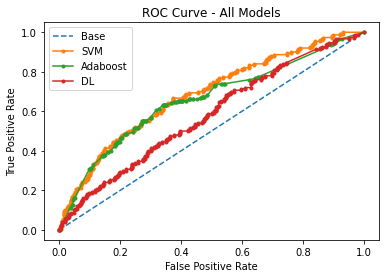

In [ ]:
dl_fpr, dl_tpr, _ = roc_curve(y_test, probs)
base_fpr, base_tpr, _ = roc_curve(y_test, base_probs)

# plot the roc curve for the model
plt.plot(base_fpr,base_tpr, linestyle='--', label='Base')
plt.plot(model_to_fpr_tpr['Support Vector Machine'][0], model_to_fpr_tpr['Support Vector Machine'][1], marker='.', label='SVM')
plt.plot(model_to_fpr_tpr['Adaboost'][0], model_to_fpr_tpr['Adaboost'][1], marker='.', label='Adaboost')
plt.plot(dl_fpr, dl_tpr, marker='.', label='DL')

plt.title('ROC Curve - All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

An important metric that represent what we talked about is the blanaced accuracy and the AUC that shows this ratio. We can see that the model with the highest AUC score is SVM.  

Our chosen model is a linear model of SVM, because it is predictng correctly almost 70% from class 1. The precision of class 1 is low on all models.